In [223]:
!pip install pandas numpy matplotlib seaborn scipy statsmodels scikit-learn openpyxl xlsxwriter pyreadstat

# DATA PREPARATION

In [304]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
    
df = pd.read_excel('Final_BOC_Dataset.xlsx')

df.head(10)


Date  Time        GDP    UNRATE  Labour_Prod        CEER         AWE  \
0 2000-01-01     1  1514676.0  7.300000       84.076  102.433333         NaN   
1 2000-04-01     2  1532503.0  6.700000       84.845  101.533333         NaN   
2 2000-07-01     3  1548212.0  6.833333       85.627  101.960000         NaN   
3 2000-10-01     4  1551274.0  6.433333       85.213  100.190000         NaN   
4 2001-01-01     5  1560006.0  7.533333       85.495  100.256667  656.510000   
5 2001-04-01     6  1564912.0  7.066667       86.122  100.453333  653.983333   
6 2001-07-01     7  1563812.0  7.133333       86.456   99.956667  656.990000   
7 2001-10-01     8  1573191.0  7.133333       87.279   97.840000  660.590000   
8 2002-01-01     9  1596194.0  8.533333       87.701   97.576667  664.443333   
9 2002-04-01    10  1605625.0  7.666667       87.545   99.223333  671.856667   

      GOC5Y  BOS   IE1  ...        CPI  Output_Gap  FAM_IO     GSCPI  \
0       NaN  NaN   NaN  ...  94.366667         2.2    78.2 -0.419113   
1       NaN  NaN   NaN  ...  94.800000         2.4    79.3  0.140678   
2       NaN  NaN   NaN  ...  95.666667         2.5    80.1  0.070235   
3       NaN  NaN   NaN  ...  96.700000         2.0    80.6 -0.692584   
4  5.125781  NaN   NaN  ...  96.933333         1.7    80.8 -0.732597   
5  5.335238  NaN  25.0  ...  98.200000         1.3    80.6 -0.878692   
6  5.083871  NaN  34.0  ...  98.233333         0.6    80.5 -0.713829   
7  4.510968  NaN  59.0  ...  97.733333         0.3    80.5 -1.246862   
8  4.760000  NaN  62.0  ...  98.433333         0.9    80.5 -0.597063   
9  4.961406  NaN  28.0  ...  99.500000         0.9    80.9 -0.509864   

   Overnight_Rate  Infl_Exp_1y  Infl_Exp_2y  Job_Vacancy_Rate  \
0             NaN          NaN          NaN               NaN   
1             NaN          NaN          NaN               NaN   
2             NaN          NaN          NaN               NaN   
3             NaN          NaN          NaN               NaN   
4        5.456990          NaN          NaN               NaN   
5        4.632617          NaN          NaN               NaN   
6        3.994027          NaN          NaN               NaN   
7        2.544803          NaN          NaN               NaN   
8        2.037633          NaN          NaN               NaN   
9        2.255553          NaN          NaN               NaN   

   Unit_Labour_Cost  USA_Interest_Rate  
0            71.995           5.676667  
1            73.192           6.273333  
2            73.379           6.520000  
3            73.935           6.473333  
4            74.300           5.593333  
5            74.328           4.326667  
6            74.630           3.496667  
7            74.563           2.133333  
8            74.298           1.733333  
9            74.738           1.750000  

[10 rows x 24 columns]

In [305]:
df2 = df[(df['Time'] > 14) & (df['Time'] <= 101)].drop(['GDP', 'Infl_Exp_1y', 'Infl_Exp_2y', 'UNRATE', 'AWE', 'ENERGY', 'FAM_IO', 'Unit_Labour_Cost', 'Job_Vacancy_Rate', 'IE1', 'IE2', 'IE3'], axis=1)

df2["D_Crisis"] = (((df2["Time"] >= 35) & (df2["Time"] <= 40)) | ((df2["Time"] >= 81) & (df2["Time"] <= 84))).astype(int)

df2.head(10)


Date  Time  Labour_Prod        CEER     GOC5Y   BOS        BCPI  \
14 2003-07-01    15       88.140  108.466667  3.875079 -0.44  325.423333   
15 2003-10-01    16       87.693  112.210000  4.048710 -0.56  334.496667   
16 2004-01-01    17       87.659  110.736667  3.526562 -0.47  372.266667   
17 2004-04-01    18       88.141  108.493333  3.931587  0.89  402.123333   
18 2004-07-01    19       89.142  112.610000  3.940159  1.01  408.570000   
19 2004-10-01    20       89.488  118.706667  3.832742  0.72  427.096667   
20 2005-01-01    21       89.710  117.316667  3.653387  1.25  448.690000   
21 2005-04-01    22       90.180  116.356667  3.429219  0.84  467.046667   
22 2005-07-01    23       90.916  121.060000  3.411746  2.60  537.236667   
23 2005-10-01    24       91.466  124.806667  3.845410  2.70  569.150000   

           CPI  Output_Gap     GSCPI  Overnight_Rate  USA_Interest_Rate  \
14  102.766667         0.2  0.013659        2.965950           1.016667   
15  103.200000         0.4 -0.342725        2.750000           0.996667   
16  103.700000         0.5 -0.294377        2.360217           1.003333   
17  104.500000         1.0  0.390355        2.027777           1.010000   
18  104.766667         1.4 -0.123189        2.055557           1.433333   
19  105.566667         1.5 -0.174911        2.478493           1.950000   
20  105.966667         1.3 -0.170232        2.500000           2.470000   
21  106.433333         1.4 -1.070653        2.500000           2.943333   
22  107.466667         1.8 -0.424957        2.555557           3.460000   
23  108.000000         2.1 -0.462234        2.975807           3.980000   

    D_Crisis  
14         0  
15         0  
16         0  
17         0  
18         0  
19         0  
20         0  
21         0  
22         0  
23         0

In [306]:
missing_values = df2.isnull().sum()

print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Date                 0
Time                 0
Labour_Prod          0
CEER                 0
GOC5Y                0
BOS                  0
BCPI                 0
CPI                  0
Output_Gap           0
GSCPI                0
Overnight_Rate       0
USA_Interest_Rate    0
D_Crisis             0
dtype: int64


In [307]:
df2.head()

Date  Time  Labour_Prod        CEER     GOC5Y   BOS        BCPI  \
14 2003-07-01    15       88.140  108.466667  3.875079 -0.44  325.423333   
15 2003-10-01    16       87.693  112.210000  4.048710 -0.56  334.496667   
16 2004-01-01    17       87.659  110.736667  3.526562 -0.47  372.266667   
17 2004-04-01    18       88.141  108.493333  3.931587  0.89  402.123333   
18 2004-07-01    19       89.142  112.610000  3.940159  1.01  408.570000   

           CPI  Output_Gap     GSCPI  Overnight_Rate  USA_Interest_Rate  \
14  102.766667         0.2  0.013659        2.965950           1.016667   
15  103.200000         0.4 -0.342725        2.750000           0.996667   
16  103.700000         0.5 -0.294377        2.360217           1.003333   
17  104.500000         1.0  0.390355        2.027777           1.010000   
18  104.766667         1.4 -0.123189        2.055557           1.433333   

    D_Crisis  
14         0  
15         0  
16         0  
17         0  
18         0

# TRANSFORMING VARIABLES TO ENSURE STATIONARITY

**Let's check which ones are not stationary first**

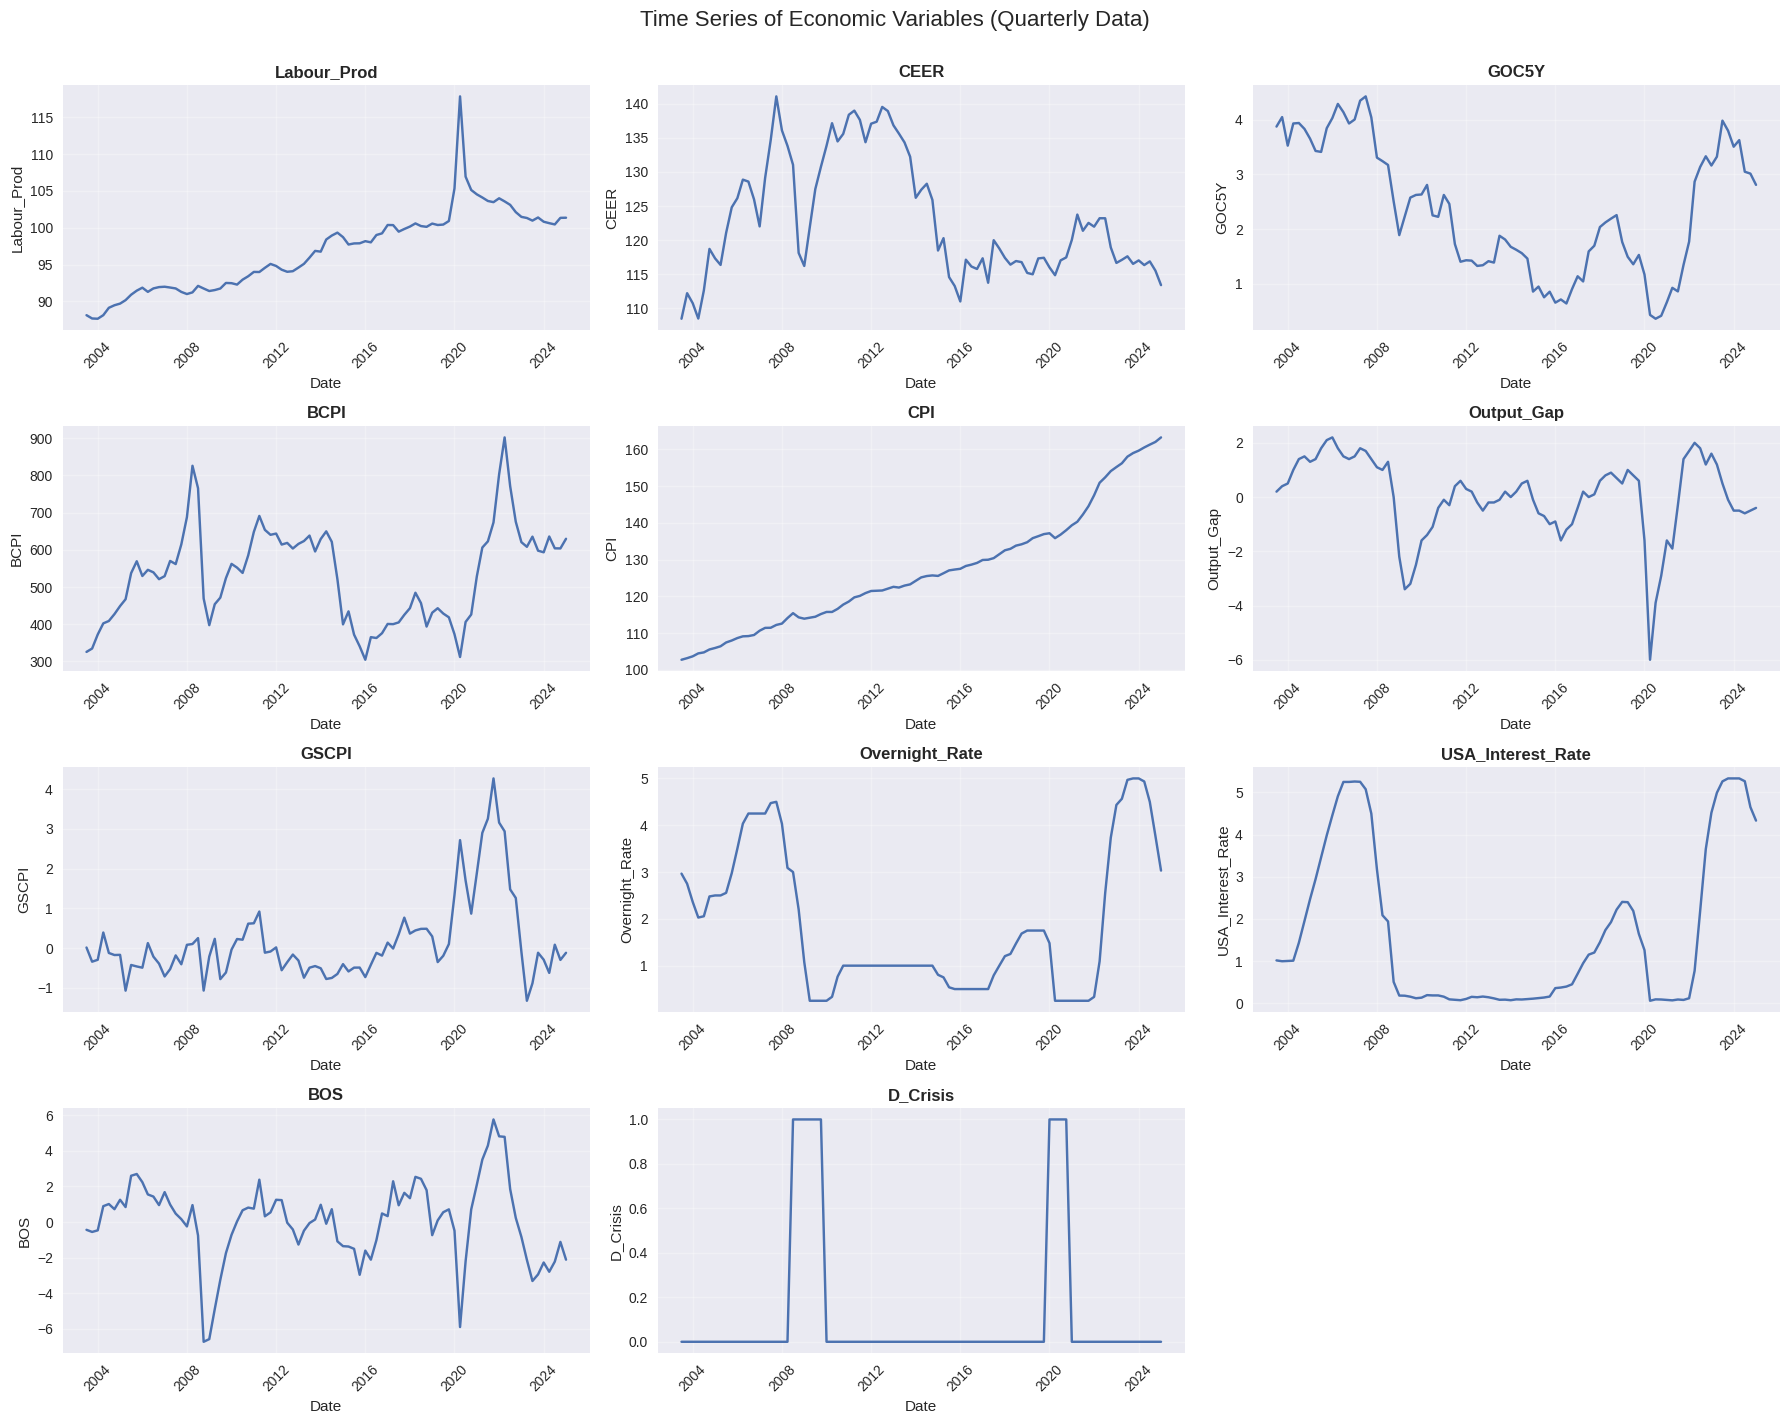

In [308]:
# Set up the plotting style
plt.style.use('seaborn-v0_8')
fig, axes = plt.subplots(6, 3, figsize=(18, 20))
axes = axes.ravel()  

# List of variables to plot (excluding Date and Time)
variables = ['Labour_Prod', 'CEER', 'GOC5Y', 'BCPI', 'CPI', 'Output_Gap', 'GSCPI', 'Overnight_Rate', 'USA_Interest_Rate', 'BOS', 'D_Crisis']

# Create a plot for each variable
for i, var in enumerate(variables):
    axes[i].plot(df2['Date'], df2[var])
    axes[i].set_title(var, fontweight='bold')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel(var)
    axes[i].grid(True, alpha=0.3)
    
    plt.setp(axes[i].xaxis.get_majorticklabels(), rotation=45)

# Hide any unused subplots
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.suptitle('Time Series of Economic Variables (Quarterly Data)', fontsize=16, y=1.02)
plt.show()

**We can see that some of these are not stationary. So we will transform them to make them stationary. We will do this by getting their log-differences which is similar to percentage change: year-over-year difference instead of quarterly. This is BOC standard.**

In [309]:
# Copy & sort
df3 = df2.copy().sort_values("Date").reset_index(drop=True)

# Transform *other* positives to annualized q/q log-diff (×4, %)
vars_to_transform = ["CEER","GOC5Y","BCPI", "CPI", "Labour_Prod"]  
for v in vars_to_transform:
    df3[v] = np.log(df3[v])
    df3[v] = 4 * df3[v].diff() * 100

# Clean up
df3 = df3.dropna().reset_index(drop=True)


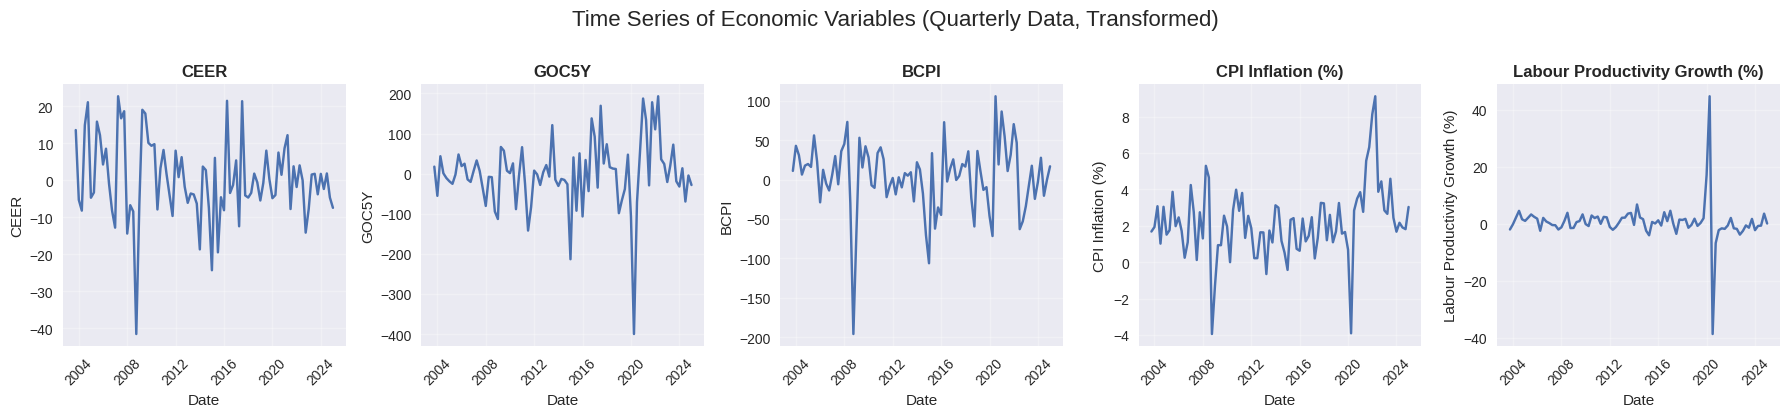

In [310]:
# --- Plotting for df3 ---
plt.style.use('seaborn-v0_8')
fig, axes = plt.subplots(6, 5, figsize=(18, 20))
axes = axes.ravel()

# Variables to plot from df3
variables = ["CEER","GOC5Y","BCPI", "CPI", "Labour_Prod"]

# Custom labels for transformed growth variables
label_map = {
    'GDP': 'GDP Growth (%)',
    'Labour_Prod': 'Labour Productivity Growth (%)',
    'AWE': 'Average Weekly Earnings Growth (%)',
    'CPI': 'CPI Inflation (%)',
    'FAM_IO': 'Foreign Activity Measure Growth (%)',
    'Unit_Labour_Cost': 'Unit Labour Cost Growth (%)'
}

for i, var in enumerate(variables):
    axes[i].plot(df3['Date'], df3[var])
    axes[i].set_title(label_map.get(var, var), fontweight='bold')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel(label_map.get(var, var))
    axes[i].grid(True, alpha=0.3)
    
    plt.setp(axes[i].xaxis.get_majorticklabels(), rotation=45)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.suptitle('Time Series of Economic Variables (Quarterly Data, Transformed)', 
             fontsize=16, y=1.02)
plt.show()


**Great! Everything LOOKS stationary, but lets do an Augmented Dickey-Fuller Test just to make sure.**

In [311]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import numpy as np

# List of your variables (excluding Date and Time)
variables = ['Labour_Prod', 'CEER', 'GOC5Y', 'BCPI', 'CPI', 'Output_Gap', 'GSCPI', 'Overnight_Rate', 'USA_Interest_Rate', 'BOS', 'D_Crisis']


# Function to perform ADF test and return results in a readable format
def adf_test(series, signif=0.05, name=''):
    """Perform ADF test and return results as a Series"""
    result = adfuller(series, autolag='BIC')
    p_value = result[1]
    
    # Interpretation
    if p_value <= signif:
        interpretation = "Stationary"
    else:
        interpretation = "Not-Stat"
    
    return pd.Series({
        'Variable': name,
        'ADF Statistic': result[0],
        'p-value': p_value,
        '# Lags Used': result[2],
        '# Observations': result[3],
        'Critical Value (1%)': result[4]['1%'],
        'Critical Value (5%)': result[4]['5%'],
        'Critical Value (10%)': result[4]['10%'],
        'Stationarity': interpretation
    })

# Perform ADF test for each variable in df3
adf_results = pd.DataFrame()
for var in variables:
    # Check if the variable exists in df3
    if var in df3.columns:
        result = adf_test(df3[var], name=var)
        adf_results = pd.concat([adf_results, result.to_frame().T], ignore_index=True)
    else:
        print(f"Warning: Variable '{var}' not found in df3")

# Display the results
print("Augmented Dickey-Fuller Test Results:")
print(adf_results)

Augmented Dickey-Fuller Test Results:
             Variable ADF Statistic   p-value # Lags Used # Observations  \
0         Labour_Prod    -10.475354       0.0           0             85   
1                CEER     -7.950531       0.0           0             85   
2               GOC5Y     -7.082136       0.0           0             85   
3                BCPI      -7.04052       0.0           0             85   
4                 CPI     -5.762531  0.000001           0             85   
5          Output_Gap     -3.628712  0.005235           1             84   
6               GSCPI     -2.619112  0.089111           0             85   
7      Overnight_Rate      -2.92381  0.042648           1             84   
8   USA_Interest_Rate     -2.543013  0.105356           1             84   
9                 BOS     -3.000528  0.034845           0             85   
10           D_Crisis     -3.257149  0.016906           0             85   

   Critical Value (1%) Critical Value (5%) Critic

**THIS IS OKAY: The only variables that are not completely stationary, GSCPI and US Interest Rate, are at least stationary at 10%, which is okay for now. Both is not stationary due to significant changes in values in 2020 when the global economy faced incidents like COVID, the Suez Canal incident, the semiconductor shortage, etc.**

### SUMMARY STATISTICS

In [312]:
df3.head()

Date  Time  Labour_Prod       CEER      GOC5Y   BOS       BCPI  \
0 2003-10-01    16    -2.033752  13.571684  17.532835 -0.56  11.000006   
1 2004-01-01    17    -0.155117  -5.286842 -55.229853 -0.47  42.793412   
2 2004-04-01    18     2.193407  -8.186513  43.487855  0.89  30.859359   
3 2004-07-01    19     4.517120  14.896718   0.871109  1.01   6.361767   
4 2004-10-01    20     1.549574  21.089977 -11.056221  0.72  17.738846   

        CPI  Output_Gap     GSCPI  Overnight_Rate  USA_Interest_Rate  D_Crisis  
0  1.683123         0.4 -0.342725        2.750000           0.996667         0  
1  1.933305         0.5 -0.294377        2.360217           1.003333         0  
2  3.073982         1.0  0.390355        2.027777           1.010000         0  
3  1.019433         1.4 -0.123189        2.055557           1.433333         0  
4  3.042804         1.5 -0.174911        2.478493           1.950000         0

In [313]:
df3.describe()

Date        Time  Labour_Prod       CEER  \
count                             86   86.000000    86.000000  86.000000   
mean   2014-05-17 01:57:12.558139648   58.500000     0.649734   0.206740   
min              2003-10-01 00:00:00   16.000000   -38.769052 -41.510450   
25%              2009-01-23 12:00:00   37.250000    -1.257218  -5.924555   
50%              2014-05-16 12:00:00   58.500000     0.283511  -0.803947   
75%              2019-09-08 00:00:00   79.750000     2.072495   7.186588   
max              2025-01-01 00:00:00  101.000000    44.784770  22.697584   
std                              NaN   24.969982     7.032149  10.805831   

            GOC5Y        BOS        BCPI        CPI  Output_Gap      GSCPI  \
count   86.000000  86.000000   86.000000  86.000000   86.000000  86.000000   
mean    -1.496401   0.033256    3.069423   2.152184    0.034884   0.146362   
min   -399.659955  -6.740000 -195.933064  -3.946637   -6.000000  -1.324867   
25%    -30.237060  -1.112500  -16.751391   1.148879   -0.500000  -0.459780   
50%     -1.978647   0.325000    8.729513   1.948037    0.200000  -0.143302   
75%     33.849329   1.245000   28.052138   3.023767    1.175000   0.332787   
max    192.964567   5.770000  105.687286   9.115676    2.200000   4.264493   
std     83.416042   2.264412   43.351725   1.947927    1.470795   1.037523   

       Overnight_Rate  USA_Interest_Rate   D_Crisis  
count       86.000000          86.000000  86.000000  
mean         1.852901           1.693217   0.116279  
min          0.250000           0.060000   0.000000  
25%          0.753788           0.125833   0.000000  
50%          1.037635           0.860000   0.000000  
75%          2.919355           2.825000   0.000000  
max          5.000000           5.330000   1.000000  
std          1.505871           1.904230   0.322439

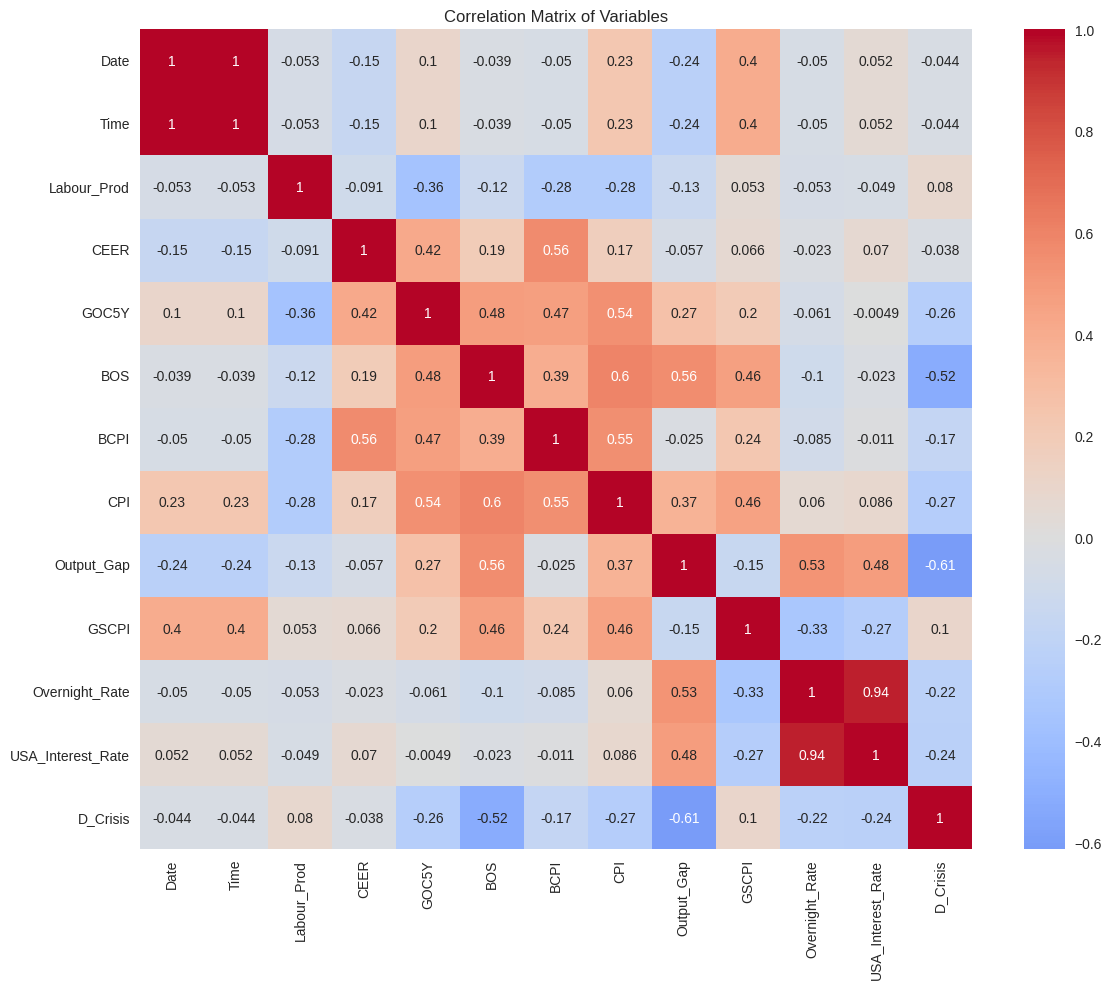


Highly Correlated Pairs (|r| > 0.7):
Date - Time: 1.000
Overnight_Rate - USA_Interest_Rate: 0.945


In [314]:
import seaborn as sns

# Correlation matrix
plt.figure(figsize=(12, 10))
corr_matrix = df3.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Variables')
plt.tight_layout()
plt.show()

# Print highly correlated pairs (|correlation| > 0.7)
print("\nHighly Correlated Pairs (|r| > 0.7):")
print("=" * 50)
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.7:
            print(f"{corr_matrix.columns[i]} - {corr_matrix.columns[j]}: {corr_matrix.iloc[i, j]:.3f}")

**This is OKAY**

In [315]:
df3.to_excel('Analysis_Set.xlsx', index=False)

# VAR MODEL FOR FORECASTING

In [316]:
df5 = pd.read_excel("Analysis_Set.xlsx")

df5 = df5.set_index("Date")

df5.head()

Time  Labour_Prod       CEER      GOC5Y   BOS       BCPI  \
Date                                                                   
2003-10-01    16    -2.033752  13.571684  17.532835 -0.56  11.000006   
2004-01-01    17    -0.155117  -5.286842 -55.229853 -0.47  42.793412   
2004-04-01    18     2.193407  -8.186513  43.487855  0.89  30.859359   
2004-07-01    19     4.517120  14.896718   0.871109  1.01   6.361767   
2004-10-01    20     1.549574  21.089977 -11.056221  0.72  17.738846   

                 CPI  Output_Gap     GSCPI  Overnight_Rate  USA_Interest_Rate  \
Date                                                                            
2003-10-01  1.683123         0.4 -0.342725        2.750000           0.996667   
2004-01-01  1.933305         0.5 -0.294377        2.360217           1.003333   
2004-04-01  3.073982         1.0  0.390355        2.027777           1.010000   
2004-07-01  1.019433         1.4 -0.123189        2.055557           1.433333   
2004-10-01  3.042804         1.5 -0.174911        2.478493           1.950000   

            D_Crisis  
Date                  
2003-10-01         0  
2004-01-01         0  
2004-04-01         0  
2004-07-01         0  
2004-10-01         0

### For Later - IGNORE FOR NOW 

In [317]:
df6 = df5.merge(df[['Date', 'Time', 'Infl_Exp_1y', 'Infl_Exp_2y']], on=['Date', 'Time'], how='left')

df6 = df6.dropna().set_index("Date")

df6.head()

Time  Labour_Prod       CEER       GOC5Y   BOS        BCPI  \
Date                                                                     
2014-10-01    60     1.601882  -7.460378  -26.326507 -1.09  -70.505260   
2015-01-01    61    -2.459931 -24.288244 -213.264178 -1.36 -106.173009   
2015-04-01    62    -4.080588   6.064868   40.570844 -1.38   33.502798   
2015-07-01    63     0.605348 -19.453995  -92.365700 -1.51  -62.219778   
2015-10-01    64     0.065388  -4.576294   50.739447 -2.97  -35.356820   

                 CPI  Output_Gap     GSCPI  Overnight_Rate  USA_Interest_Rate  \
Date                                                                            
2014-10-01  0.530715         0.6 -0.650730        1.000000           0.100000   
2015-01-01 -0.424516        -0.1 -0.403766        0.804688           0.110000   
2015-04-01  2.329281        -0.6 -0.588052        0.750000           0.123333   
2015-07-01  2.420742        -0.7 -0.492018        0.537879           0.136667   
2015-10-01  0.733849        -1.0 -0.490668        0.500000           0.160000   

            D_Crisis  Infl_Exp_1y  Infl_Exp_2y  
Date                                            
2014-10-01         0         2.91         3.03  
2015-01-01         0         2.08         2.91  
2015-04-01         0         2.51         2.93  
2015-07-01         0         2.20         2.75  
2015-10-01         0         2.18         2.93

### MAIN MODEL

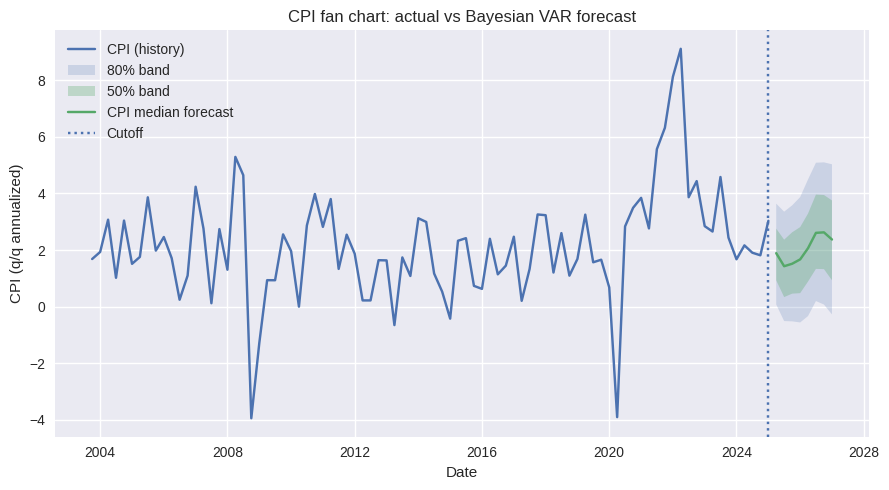

No overlapping actual CPI within the forecast window for evaluation.


In [318]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from numpy.linalg import cholesky
from scipy.stats import invwishart
import warnings
warnings.filterwarnings('ignore')

def run_bvar_fanchart(
    df5,
    endog_cols=('Labour_Prod','CEER','GOC5Y','BOS','BCPI','CPI','Output_Gap','GSCPI','Overnight_Rate'),
    cutoff="2022-10-01",      # start of 2022Q4
    p=2,                      # VAR lags
    steps=8,                  # forecast horizon (quarters)
    draws=2000,               # posterior draws
    shock_time=None,          # 1..steps (optional)
    shock_size=None,          # float (optional)
    shock_var='GSCPI',        # which variable to shock if used
    mu_cpi=2.0,               # long-run CPI mean (annualized q/q)
    random_state=42
):
    """
    Conjugate BVAR (Minnesota-style) with MN/IW posterior.
    - Unconditional forecast by default.
    - If both shock_time and shock_size are provided, adds a one-time innovation to `shock_var` at that horizon.
    - Plots CPI fan chart with median and 80/50% bands, overlays actuals if available post-cutoff.
    - Prints simple post-cutoff evaluation metrics vs. median forecast when overlap exists.
    """

    rng = np.random.default_rng(random_state)

    # -----------------------------
    # 0) Data prep
    # -----------------------------
    df5 = df5.copy()
    df5.index = pd.to_datetime(df5.index)
    endog_cols = list(endog_cols)

    Y_full = df5[endog_cols].dropna()
    K = Y_full.shape[1]

    cutoff_ts = pd.Timestamp(cutoff)
    train_mask = Y_full.index <= cutoff_ts
    post_mask  = Y_full.index > cutoff_ts

    Y_train = Y_full.loc[train_mask].values
    Y_post  = Y_full.loc[post_mask].values

    T = Y_train.shape[0]
    cpi_idx = endog_cols.index('CPI')

    mu    = np.mean(Y_train, axis=0).copy()
    mu[cpi_idx] = mu_cpi
    sigma = np.std(Y_train, axis=0) + 1e-6

    # Reasonable defaults for priors if you didn't grid-search earlier
    phi, lambda_, theta = 0.9, 0.2, 0.2

    # -----------------------------
    # 1) Helpers
    # -----------------------------
    def create_lags(endog, p, K):
        T = endog.shape[0]
        lagged = np.zeros((T - p, K * p))
        for l in range(p):
            lagged[:, l*K:(l+1)*K] = endog[p - 1 - l : T - 1 - l, :]
        return lagged

    def minnesota_prior(p, lambda_, theta, phi, mu, sigma, K):
        """
        Prior mean:
            intercept_i = (1-phi)*mu_i
            own first lag coefficient = phi
            others 0
        Prior variance (diagonal, column-wise base):
            var(column for lag l) = lambda^2 / l^2
        Intercept variance large (diffuse).
        """
        M = 1 + p * K
        Pi0 = np.zeros((M, K))
        Pi0[0, :] = (1.0 - phi) * mu
        for i in range(K):
            row = 1 + i
            Pi0[row, i] = phi

        v_prior = np.zeros(M)
        v_prior[0] = 100.0
        for l in range(1, p+1):
            for j in range(K):
                row = 1 + (l-1)*K + j
                v_prior[row] = (lambda_**2) / (l**2)

        V0_inv = np.diag(1.0 / v_prior)
        return Pi0, V0_inv

    def compute_posterior(Z, Y_fit, Pi0, V0_inv, S0, nu0):
        ZtZ = Z.T @ Z
        V_post_inv = V0_inv + ZtZ
        V_post = np.linalg.inv(V_post_inv)
        Pi_post = V_post @ (V0_inv @ Pi0 + Z.T @ Y_fit)
        resid = Y_fit - Z @ Pi_post
        S_post = S0 + resid.T @ resid
        nu_post = nu0 + Z.shape[0]
        return V_post, Pi_post, S_post, nu_post

    def draw_posterior(V_post, Pi_post, S_post, nu_post, draws, rng):
        M, K = Pi_post.shape
        L_V = cholesky(V_post)
        betas  = np.empty((draws, M, K))
        sigmas = np.empty((draws, K, K))
        for r in range(draws):
            Sigma = invwishart.rvs(df=nu_post, scale=S_post, random_state=rng)
            L_S  = cholesky(Sigma)
            E = rng.standard_normal((M, K))
            Beta = Pi_post + L_V @ E @ L_S.T
            betas[r]  = Beta
            sigmas[r] = Sigma
        return betas, sigmas

    name_to_idx = {n:i for i,n in enumerate(endog_cols)}

    def simulate_paths(Beta, Sigma, Y_last_p, steps, p, rng,
                       shock=None, override_path=None):
        K = Sigma.shape[0]
        M = Beta.shape[0]
        L = cholesky(Sigma)
        buf = Y_last_p.copy()
        path = np.zeros((steps, K))
        for t in range(steps):
            z = np.ones(M)
            lvec = buf[::-1].reshape(-1)
            z[1:] = lvec
            mean_t = z @ Beta
            e = L @ rng.standard_normal(K)

            if shock is not None and int(shock.get('t', -1)) == (t+1):
                v = shock.get('var')
                if v in name_to_idx:
                    e[name_to_idx[v]] += float(shock.get('size', 0.0))

            y_t = mean_t + e

            if override_path:
                for vname, series in override_path.items():
                    if vname in name_to_idx and t < len(series):
                        y_t[name_to_idx[vname]] = series[t]

            path[t] = y_t
            buf = np.vstack([buf[1:], y_t])
        return path

    def forecast_distribution(betas, sigmas, Y_hist, steps, p, rng,
                              shock=None, override_path=None):
        last_p = Y_hist[-p:, :]
        D = betas.shape[0]
        paths = np.empty((D, steps, Y_hist.shape[1]))
        for r in range(D):
            paths[r] = simulate_paths(betas[r], sigmas[r], last_p, steps, p, rng,
                                      shock=shock, override_path=override_path)
        return paths

    # -----------------------------
    # 2) Design & posterior
    # -----------------------------
    lagged = create_lags(Y_train, p, K)
    T_fit = lagged.shape[0]
    Z = np.hstack([np.ones((T_fit, 1)), lagged])   # (T-p, 1+Kp)
    Y_fit = Y_train[p:]                            # (T-p, K)

    Pi0, V0_inv = minnesota_prior(p, lambda_, theta, phi, mu, sigma, K)
    nu0 = K + 2
    S0  = np.diag((sigma**2) * 0.01)

    V_post, Pi_post, S_post, nu_post = compute_posterior(Z, Y_fit, Pi0, V0_inv, S0, nu0)

    # -----------------------------
    # 3) Draw posterior & simulate (shock if both time and size are given)
    # -----------------------------
    betas, sigmas = draw_posterior(V_post, Pi_post, S_post, nu_post, draws, rng)

    shock = None
    if (shock_time is not None) and (shock_size is not None):
        shock = {'var': shock_var, 't': int(shock_time), 'size': float(shock_size)}

    paths = forecast_distribution(betas, sigmas, Y_train, steps, p, rng, shock=shock, override_path=None)

    # -----------------------------
    # 4) Build percentiles & plot CPI fan
    # -----------------------------
    q = [10, 25, 50, 75, 90]
    cpi_q = np.percentile(paths[:, :, cpi_idx], q, axis=0)  # (5, steps)

    train_last = Y_full.index[train_mask][-1]
    start_q = pd.Period(train_last, freq='Q') + 1
    fcast_index = pd.period_range(start=start_q, periods=steps, freq='Q').to_timestamp()

    actual_cpi = Y_full['CPI'].reindex(fcast_index)
    hist_cpi = Y_full.loc[Y_full.index <= train_last, 'CPI']

    plt.figure(figsize=(9,5))
    plt.plot(hist_cpi.index, hist_cpi.values, label='CPI (history)')
    plt.fill_between(fcast_index, cpi_q[0], cpi_q[4], alpha=0.2, label='80% band')
    plt.fill_between(fcast_index, cpi_q[1], cpi_q[3], alpha=0.3, label='50% band')
    plt.plot(fcast_index, cpi_q[2], label='CPI median forecast')

    if actual_cpi.notna().any():
        plt.plot(actual_cpi.index, actual_cpi.values, linestyle='--', label='CPI actual (post-cutoff)')

    if shock is not None:
        plt.title(f"CPI fan chart (shock: {shock_var} at t={shock['t']}, size={shock['size']})")
    else:
        plt.title('CPI fan chart: actual vs Bayesian VAR forecast')

    plt.axvline(pd.Timestamp(cutoff), linestyle=':', label='Cutoff')
    plt.xlabel('Date')
    plt.ylabel('CPI (q/q annualized)')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # -----------------------------
    # 5) Simple post-cutoff evaluation
    # -----------------------------
    overlap = actual_cpi.dropna().index.intersection(fcast_index)
    if len(overlap) > 0:
        med_series = pd.Series(cpi_q[2], index=fcast_index).reindex(overlap)
        act_series = actual_cpi.reindex(overlap)
        rmse = np.sqrt(np.mean((med_series.values - act_series.values)**2))
        mae  = np.mean(np.abs(med_series.values - act_series.values))
        inside80 = ((act_series.values >= pd.Series(cpi_q[0], index=fcast_index).reindex(overlap)) &
                    (act_series.values <= pd.Series(cpi_q[4], index=fcast_index).reindex(overlap))).mean()
        print(f"Post-cutoff CPI — RMSE: {rmse:.3f}, MAE: {mae:.3f}, Coverage(80%): {inside80*100:.1f}% "
              f"over {len(overlap)} quarter(s).")
    else:
        print("No overlapping actual CPI within the forecast window for evaluation.")

    # Return key outputs if needed programmatically
    return {
        'paths': paths,             # predictive draws for all K variables
        'fcast_index': fcast_index, # forecast timestamps
        'cpi_percentiles': cpi_q,   # 10/25/50/75/90%
        'betas': betas,             # posterior draws of coefficients
        'sigmas': sigmas,           # posterior draws of covariance
        'posterior': (V_post, Pi_post, S_post, nu_post)
    }

# --- Example calls (uncomment and run) ---
out = run_bvar_fanchart(df5, cutoff="2025-01-01", p=4)
#out = run_bvar_fanchart(df5, cutoff="2022-10-01", p=4, shock_time=2, shock_size=2.0)  # with shock


# MODEL TESTING

**Let's try cutting the data off at different periods in the past, predict the future inflation from that point, and compare the model predictions to the actual inflation points. This will allow us the guage model accuracy.**

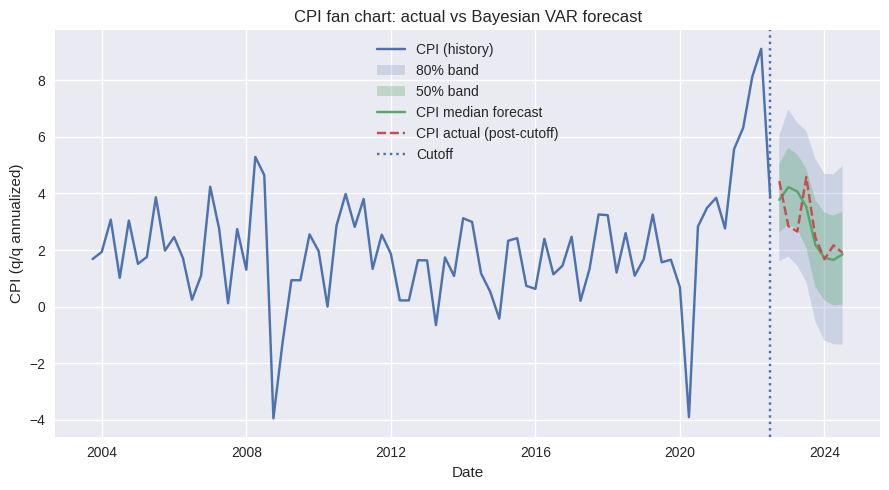

Post-cutoff CPI — RMSE: 0.851, MAE: 0.674, Coverage(80%): 100.0% over 8 quarter(s).


In [319]:
out = run_bvar_fanchart(df5, cutoff="2022-07-01", p=4)


**This is remarkably close. The model doesn't capture every caveat, but it definately capture the general trend very very well, and it also has extremely low error values. Let's try another case.**

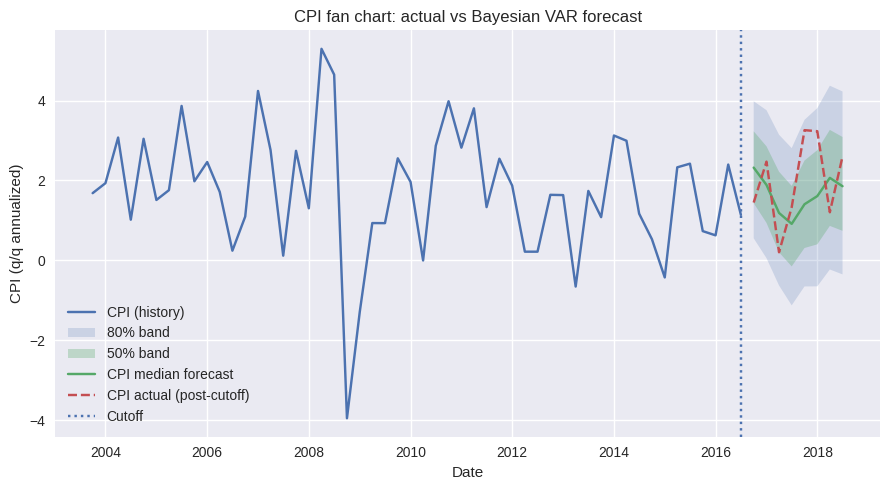

Post-cutoff CPI — RMSE: 1.095, MAE: 0.992, Coverage(80%): 100.0% over 8 quarter(s).


In [320]:
out = run_bvar_fanchart(df5, cutoff="2016-07-01", p=4)


**Slightly worse at captureing every caveat, but again remarkably well at capturing the general movement and trend. Looks like there was a shock sometime in 2018, which is explicable by the 2018 tariffs set by Trump on Canadian steel and aluminium.**

**Now for cases like this, I have put in a shock option, where we can shock the BCPI variable which includes the effects on steel and aluminium because it is the Commodity Price Index. Lets try adding this shock after a few quarters, and see how our model maps to it.**

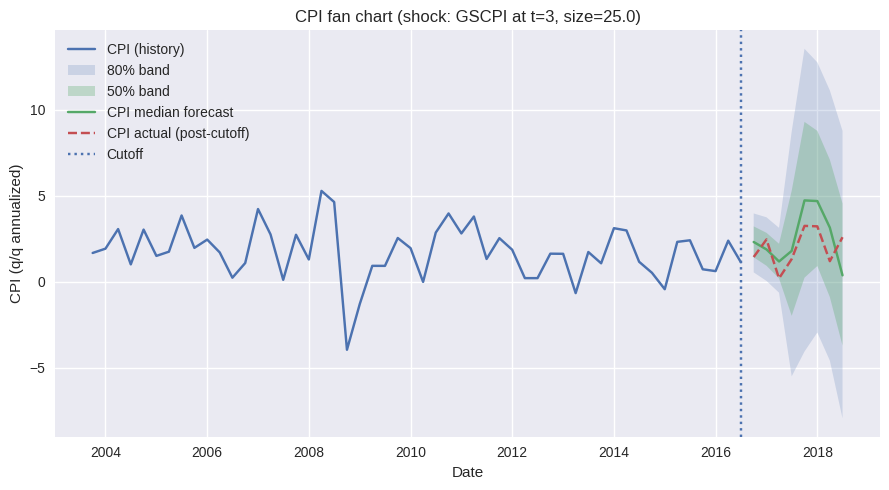

Post-cutoff CPI — RMSE: 1.387, MAE: 1.254, Coverage(80%): 100.0% over 8 quarter(s).


In [321]:
out = run_bvar_fanchart(df5, cutoff="2016-07-01", p=4, shock_time=3, shock_size=25)

**REMARKABLE! Look how close the values are!**

# OPTIMIZATION MODEL

**Now since our objective is to advise the BOC on a Policy Rate, we have to figure out which Policy Rate (a set of them across the 2 years) actually does three things:**

1) Maintains STABLE inflation: this means non-volatile

2) Maintains LOW inflation: in our case, this just means closest to 2% for the periods of forecast

3) Maintains PREDICTABLE finlation: this means the confidence interval should be narrowest

**Therefore below, we will test an optimization model which tries several sets of Overnight_Rate values to see which set in particular meets these three criteria the best. We will adhere to three rules for creating these sets:**

1) Interest rate can only move by -0.50% to +0.50% (50 basis points) a quarter

2) Interest rate will change only once a quarter (IRL its twice because it changes 8 times, but we will maintain this for simplicity

3) Interest rate will only change in multiples of 0.25%

**Now here is the model below.**


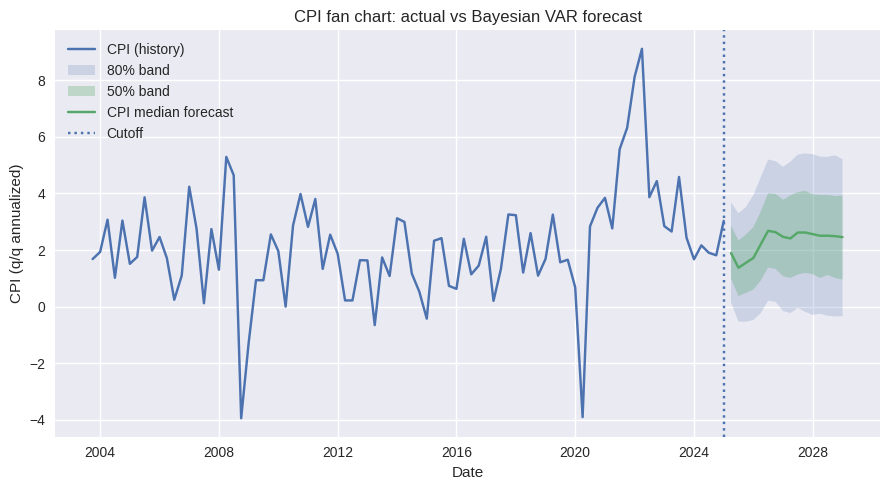

No overlapping actual CPI within the forecast window for evaluation.


In [349]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from numpy.linalg import cholesky
from scipy.stats import invwishart
import warnings
warnings.filterwarnings('ignore')

def run_bvar_fanchart(
    df5,
    endog_cols=('Labour_Prod','CEER','GOC5Y','BOS','BCPI','CPI','Output_Gap','GSCPI','Overnight_Rate'),
    cutoff="2022-10-01",      # start of 2022Q4
    p=2,                      # VAR lags
    steps=16,                  # forecast horizon (quarters)
    draws=2000,               # posterior draws
    shock_time=None,          # 1..steps (optional)
    shock_size=None,          # float (optional)
    shock_var='GSCPI',        # which variable to shock if used
    Pol_Rate=None,            # NEW: list/array with EXACTLY `steps` values for Overnight_Rate
    mu_cpi=2.0,               # long-run CPI mean (annualized q/q)
    random_state=42
):
    """
    Conjugate BVAR (Minnesota-style) with MN/IW posterior.
    - Unconditional forecast by default.
    - Optional one-time innovation shock to `shock_var` at `shock_time`.
    - NEW: Conditional path for policy rate (Overnight_Rate) via `Pol_Rate` (list/array of length `steps`).
      If provided, the model exogenizes Overnight_Rate to these values at each forecast step.
      If `Pol_Rate` length != steps, a ValueError is raised.
    - Plots CPI fan chart and prints simple post-cutoff evaluation.
    """

    rng = np.random.default_rng(random_state)

    # -----------------------------
    # 0) Data prep
    # -----------------------------
    df5 = df5.copy()
    df5.index = pd.to_datetime(df5.index)
    endog_cols = list(endog_cols)

    if 'Overnight_Rate' not in endog_cols:
        raise ValueError("endog_cols must include 'Overnight_Rate' for Pol_Rate conditioning.")

    Y_full = df5[endog_cols].dropna()
    K = Y_full.shape[1]

    cutoff_ts = pd.Timestamp(cutoff)
    train_mask = Y_full.index <= cutoff_ts
    post_mask  = Y_full.index > cutoff_ts

    Y_train = Y_full.loc[train_mask].values
    Y_post  = Y_full.loc[post_mask].values

    T = Y_train.shape[0]
    cpi_idx = endog_cols.index('CPI')

    mu    = np.mean(Y_train, axis=0).copy()
    mu[cpi_idx] = mu_cpi
    sigma = np.std(Y_train, axis=0) + 1e-6

    # Priors (defaults; you can grid-search elsewhere and plug the best)
    phi, lambda_, theta = 0.9, 0.2, 0.2

    # -----------------------------
    # 1) Helpers
    # -----------------------------
    def create_lags(endog, p, K):
        T = endog.shape[0]
        lagged = np.zeros((T - p, K * p))
        for l in range(p):
            lagged[:, l*K:(l+1)*K] = endog[p - 1 - l : T - 1 - l, :]
        return lagged

    def minnesota_prior(p, lambda_, theta, phi, mu, sigma, K):
        """
        Prior mean:
            intercept_i = (1-phi)*mu_i
            own first lag coefficient = phi
        Prior variance (diagonal, column-wise base):
            var(column for lag l) = lambda^2 / l^2
        Intercept variance large (diffuse).
        """
        M = 1 + p * K
        Pi0 = np.zeros((M, K))
        Pi0[0, :] = (1.0 - phi) * mu
        for i in range(K):
            row = 1 + i
            Pi0[row, i] = phi

        v_prior = np.zeros(M)
        v_prior[0] = 100.0
        for l in range(1, p+1):
            for j in range(K):
                row = 1 + (l-1)*K + j
                v_prior[row] = (lambda_**2) / (l**2)

        V0_inv = np.diag(1.0 / v_prior)
        return Pi0, V0_inv

    def compute_posterior(Z, Y_fit, Pi0, V0_inv, S0, nu0):
        ZtZ = Z.T @ Z
        V_post_inv = V0_inv + ZtZ
        V_post = np.linalg.inv(V_post_inv)
        Pi_post = V_post @ (V0_inv @ Pi0 + Z.T @ Y_fit)
        resid = Y_fit - Z @ Pi_post
        S_post = S0 + resid.T @ resid
        nu_post = nu0 + Z.shape[0]
        return V_post, Pi_post, S_post, nu_post

    def draw_posterior(V_post, Pi_post, S_post, nu_post, draws, rng):
        M, K = Pi_post.shape
        L_V = cholesky(V_post)
        betas  = np.empty((draws, M, K))
        sigmas = np.empty((draws, K, K))
        for r in range(draws):
            Sigma = invwishart.rvs(df=nu_post, scale=S_post, random_state=rng)
            L_S  = cholesky(Sigma)
            E = rng.standard_normal((M, K))
            Beta = Pi_post + L_V @ E @ L_S.T
            betas[r]  = Beta
            sigmas[r] = Sigma
        return betas, sigmas

    name_to_idx = {n:i for i,n in enumerate(endog_cols)}

    def simulate_paths(Beta, Sigma, Y_last_p, steps, p, rng,
                       shock=None, override_path=None):
        K = Sigma.shape[0]
        M = Beta.shape[0]
        L = cholesky(Sigma)
        buf = Y_last_p.copy()
        path = np.zeros((steps, K))
        for t in range(steps):
            z = np.ones(M)
            lvec = buf[::-1].reshape(-1)
            z[1:] = lvec
            mean_t = z @ Beta
            e = L @ rng.standard_normal(K)

            if shock is not None and int(shock.get('t', -1)) == (t+1):
                v = shock.get('var')
                if v in name_to_idx:
                    e[name_to_idx[v]] += float(shock.get('size', 0.0))

            y_t = mean_t + e

            if override_path:
                for vname, series in override_path.items():
                    if vname in name_to_idx and t < len(series):
                        y_t[name_to_idx[vname]] = series[t]

            path[t] = y_t
            buf = np.vstack([buf[1:], y_t])
        return path

    def forecast_distribution(betas, sigmas, Y_hist, steps, p, rng,
                              shock=None, override_path=None):
        last_p = Y_hist[-p:, :]
        D = betas.shape[0]
        paths = np.empty((D, steps, Y_hist.shape[1]))
        for r in range(D):
            paths[r] = simulate_paths(betas[r], sigmas[r], last_p, steps, p, rng,
                                      shock=shock, override_path=override_path)
        return paths

    # -----------------------------
    # 2) Design & posterior
    # -----------------------------
    lagged = create_lags(Y_train, p, K)
    T_fit = lagged.shape[0]
    Z = np.hstack([np.ones((T_fit, 1)), lagged])   # (T-p, 1+Kp)
    Y_fit = Y_train[p:]                            # (T-p, K)

    Pi0, V0_inv = minnesota_prior(p, lambda_, theta, phi, mu, sigma, K)
    nu0 = K + 2
    S0  = np.diag((sigma**2) * 0.01)

    V_post, Pi_post, S_post, nu_post = compute_posterior(Z, Y_fit, Pi0, V0_inv, S0, nu0)

    # -----------------------------
    # 3) Draw posterior & simulate (shock/policy path as specified)
    # -----------------------------
    betas, sigmas = draw_posterior(V_post, Pi_post, S_post, nu_post, draws, rng)

    # Set up optional shock
    shock = None
    if (shock_time is not None) and (shock_size is not None):
        shock = {'var': shock_var, 't': int(shock_time), 'size': float(shock_size)}

    # NEW: policy rate override path
    override = None
    if Pol_Rate is not None:
        # Validate and coerce
        Pol_Rate_arr = np.asarray(Pol_Rate, dtype=float).reshape(-1)
        if Pol_Rate_arr.size != steps:
            raise ValueError(f"Pol_Rate must contain exactly {steps} values (one per forecast step).")
        override = {'Overnight_Rate': Pol_Rate_arr}

    paths = forecast_distribution(
        betas, sigmas, Y_train, steps, p, rng,
        shock=shock,
        override_path=override
    )

    # -----------------------------
    # 4) Build percentiles & plot CPI fan
    # -----------------------------
    q = [10, 25, 50, 75, 90]
    cpi_q = np.percentile(paths[:, :, cpi_idx], q, axis=0)  # (5, steps)

    train_last = Y_full.index[train_mask][-1]
    start_q = pd.Period(train_last, freq='Q') + 1
    fcast_index = pd.period_range(start=start_q, periods=steps, freq='Q').to_timestamp()

    actual_cpi = Y_full['CPI'].reindex(fcast_index)
    hist_cpi = Y_full.loc[Y_full.index <= train_last, 'CPI']

    plt.figure(figsize=(9,5))
    plt.plot(hist_cpi.index, hist_cpi.values, label='CPI (history)')
    plt.fill_between(fcast_index, cpi_q[0], cpi_q[4], alpha=0.2, label='80% band')
    plt.fill_between(fcast_index, cpi_q[1], cpi_q[3], alpha=0.3, label='50% band')
    plt.plot(fcast_index, cpi_q[2], label='CPI median forecast')

    if actual_cpi.notna().any():
        plt.plot(actual_cpi.index, actual_cpi.values, linestyle='--', label='CPI actual (post-cutoff)')

    title = 'CPI fan chart: actual vs Bayesian VAR forecast'
    if shock is not None:
        title += f" | shock {shock_var}@t={shock['t']} size={shock['size']}"
    if override is not None:
        title += " | policy path exogenized"

    plt.title(title)
    plt.axvline(pd.Timestamp(cutoff), linestyle=':', label='Cutoff')
    plt.xlabel('Date')
    plt.ylabel('CPI (q/q annualized)')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # -----------------------------
    # 5) Simple post-cutoff evaluation
    # -----------------------------
    overlap = actual_cpi.dropna().index.intersection(fcast_index)
    if len(overlap) > 0:
        med_series = pd.Series(cpi_q[2], index=fcast_index).reindex(overlap)
        act_series = actual_cpi.reindex(overlap)
        rmse = np.sqrt(np.mean((med_series.values - act_series.values)**2))
        mae  = np.mean(np.abs(med_series.values - act_series.values))
        inside80 = ((act_series.values >= pd.Series(cpi_q[0], index=fcast_index).reindex(overlap)) &
                    (act_series.values <= pd.Series(cpi_q[4], index=fcast_index).reindex(overlap))).mean()
        print(f"Post-cutoff CPI — RMSE: {rmse:.3f}, MAE: {mae:.3f}, Coverage(80%): {inside80*100:.1f}% "
              f"over {len(overlap)} quarter(s).")
    else:
        print("No overlapping actual CPI within the forecast window for evaluation.")

    return {
        'paths': paths,             # predictive draws for all K variables
        'fcast_index': fcast_index, # forecast timestamps
        'cpi_percentiles': cpi_q,   # 10/25/50/75/90%
        'betas': betas,             # posterior draws of coefficients
        'sigmas': sigmas,           # posterior draws of covariance
        'posterior': (V_post, Pi_post, S_post, nu_post)
    }

# --- Example calls (uncomment and run) ---
out = run_bvar_fanchart(df5, cutoff="2025-01-01", p=4)#, Pol_Rate=[2.75]*8)  # condition on flat 8Q path


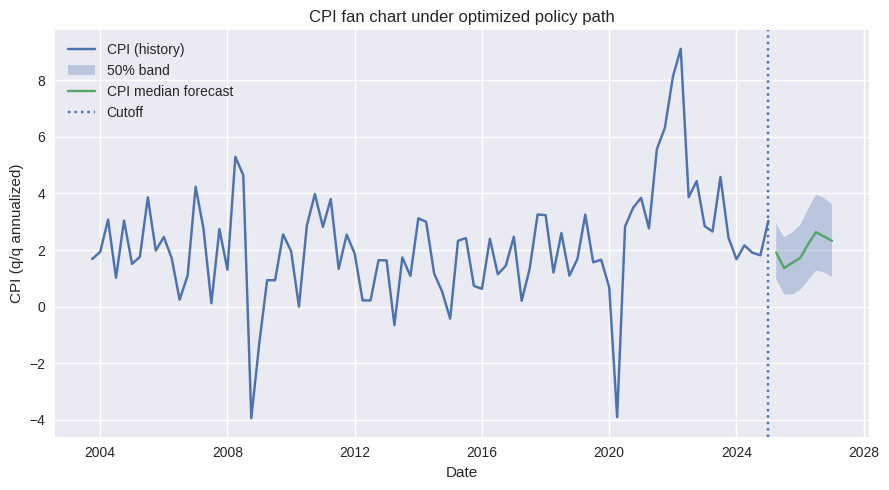

== Optimized Policy Path (Overnight_Rate, 8Q) ==
[3.0, 2.5, 2.0, 1.5, 1.0, 1.5, 2.0, 1.5]

== Metrics (lower is better; weighted J is objective) ==
L (avg |median-2%|): 0.389
S (RMS Δ median):   0.347
P (avg 50% width):  2.359
J (weighted sum):   0.894

== Averages over horizon ==
Average median CPI: 2.022
Average 50% CI: [0.860, 3.219] (width 2.359)


In [364]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import cholesky
from scipy.stats import invwishart
import warnings
warnings.filterwarnings('ignore')

# -----------------------------
# Core BVAR fit (conjugate MN/IW)
# -----------------------------
def _create_lags(endog, p, K):
    T = endog.shape[0]
    lagged = np.zeros((T - p, K * p))
    for l in range(p):
        lagged[:, l*K:(l+1)*K] = endog[p - 1 - l : T - 1 - l, :]
    return lagged

def _minnesota_prior(p, lambda_, theta, phi, mu, sigma, K):
    M = 1 + p * K
    Pi0 = np.zeros((M, K))
    Pi0[0, :] = (1.0 - phi) * mu    # intercepts
    for i in range(K):
        Pi0[1 + i, i] = phi         # own lag-1
    v_prior = np.zeros(M)
    v_prior[0] = 100.0
    for l in range(1, p+1):
        for j in range(K):
            v_prior[1 + (l-1)*K + j] = (lambda_**2) / (l**2)
    V0_inv = np.diag(1.0 / v_prior)
    return Pi0, V0_inv

def _posterior(Z, Y_fit, Pi0, V0_inv, S0, nu0):
    ZtZ = Z.T @ Z
    V_post_inv = V0_inv + ZtZ
    V_post = np.linalg.inv(V_post_inv)
    Pi_post = V_post @ (V0_inv @ Pi0 + Z.T @ Y_fit)
    resid = Y_fit - Z @ Pi_post
    S_post = S0 + resid.T @ resid
    nu_post = nu0 + Z.shape[0]
    return V_post, Pi_post, S_post, nu_post

def _draw_posterior(V_post, Pi_post, S_post, nu_post, draws, rng):
    M, K = Pi_post.shape
    L_V = cholesky(V_post)
    betas  = np.empty((draws, M, K))
    sigmas = np.empty((draws, K, K))
    for r in range(draws):
        Sigma = invwishart.rvs(df=nu_post, scale=S_post, random_state=rng)
        # Robust cholesky in case of marginal numerical issues
        for _ in range(3):
            try:
                L_S  = cholesky(Sigma)
                break
            except np.linalg.LinAlgError:
                Sigma = Sigma + 1e-10*np.eye(Sigma.shape[0])
        E = rng.standard_normal((M, K))
        Beta = Pi_post + L_V @ E @ L_S.T
        betas[r]  = Beta
        sigmas[r] = Sigma
    return betas, sigmas

def fit_bvar(df5, endog_cols, cutoff, p=2, draws=2000, mu_cpi=2.0, random_state=42):
    rng = np.random.default_rng(random_state)
    endog_cols = list(endog_cols)
    df5 = df5.copy()
    df5.index = pd.to_datetime(df5.index)
    Y_full = df5[endog_cols].dropna()
    K = Y_full.shape[1]

    cutoff_ts = pd.Timestamp(cutoff)
    train_mask = Y_full.index <= cutoff_ts

    Y_train = Y_full.loc[train_mask].values
    T = Y_train.shape[0]

    mu    = np.mean(Y_train, axis=0).copy()
    sigma = np.std(Y_train, axis=0) + 1e-6
    cpi_idx = endog_cols.index('CPI')
    mu[cpi_idx] = mu_cpi

    # Priors (simple defaults; you can grid-search separately)
    phi, lambda_, theta = 0.9, 0.2, 0.2

    lagged = _create_lags(Y_train, p, K)
    Z = np.hstack([np.ones((lagged.shape[0], 1)), lagged])
    Y_fit = Y_train[p:]

    Pi0, V0_inv = _minnesota_prior(p, lambda_, theta, phi, mu, sigma, K)
    nu0 = K + 2
    S0  = np.diag((sigma**2) * 0.01)

    V_post, Pi_post, S_post, nu_post = _posterior(Z, Y_fit, Pi0, V0_inv, S0, nu0)
    betas, sigmas = _draw_posterior(V_post, Pi_post, S_post, nu_post, draws, rng)

    return {
        'betas': betas,
        'sigmas': sigmas,
        'Y_full': Y_full,
        'Y_train': Y_train,
        'endog_cols': endog_cols,
        'cutoff_ts': cutoff_ts,
        'p': p,
        'steps_default': 8,
        'rng': rng
    }

# -----------------------------
# Simulation with policy path + common random numbers
# -----------------------------
def simulate_policy(betas, sigmas, Y_hist, endog_cols, p, steps, Pol_Rate,
                    normals=None, shock=None):
    """
    betas: (D, M, K), sigmas: (D, K, K), Y_hist:(T,K), endog_cols list
    Pol_Rate: array length = steps
    normals: (D, steps, K) standard normals reused across candidates
    shock: dict or None, e.g. {'var':'GSCPI','t':2,'size':5.0} (1-based t)
           -> additive innovation to that variable at that forecast step.
    """
    name_to_idx = {n:i for i,n in enumerate(endog_cols)}
    if 'Overnight_Rate' not in name_to_idx:
        raise ValueError("endog_cols must include 'Overnight_Rate'.")

    K = sigmas.shape[1]
    D = betas.shape[0]
    M = betas.shape[1]
    idx_pol = name_to_idx['Overnight_Rate']

    last_p = Y_hist[-p:, :].copy()
    paths = np.empty((D, steps, K))

    for r in range(D):
        Beta  = betas[r]
        Sigma = sigmas[r]
        L = np.linalg.cholesky(Sigma)
        buf = last_p.copy()
        for t in range(steps):
            z = np.ones(M)
            z[1:] = buf[::-1].reshape(-1)
            mean_t = z @ Beta
            zdraw = normals[r, t] if normals is not None else np.random.standard_normal(K)
            e = L @ zdraw

            # one-time shock (additive on innovation)
            if shock is not None and int(shock.get('t', -1)) == (t+1):
                v = shock.get('var')
                if v in name_to_idx:
                    e[name_to_idx[v]] += float(shock.get('size', 0.0))

            y_t = mean_t + e
            # exogenize Overnight_Rate to policy path
            y_t[idx_pol] = Pol_Rate[t]

            paths[r, t] = y_t
            buf = np.vstack([buf[1:], y_t])
    return paths


def optimize_policy(df5,
                    cutoff="2025-01-01",
                    p=4,
                    steps=8,
                    draws=2000,
                    draws_screen=400,
                    beam_width=200,
                    r_min=0.0,
                    r_max=5.0,
                    increments=(-0.50,-0.25,0.0,0.25,0.50),
                    endog_cols=('Labour_Prod','CEER','GOC5Y','BOS','BCPI','CPI','Output_Gap','GSCPI','Overnight_Rate'),
                    wL=0.5, wS=0.25, wP=0.25,
                    shock_time=None,            # NEW
                    shock_size=None,            # NEW
                    shock_var='GSCPI',          # NEW
                    random_state=42):
    """
    Returns dict with:
      best_path, metrics (L,S,P,J), avg_median, avg_ci50_low/high,
      q25/q50/q75 arrays; and plots the CPI fan chart.

    Shock, if provided, is included in baseline, screening, and final evaluations.
    """
    # 1) Fit once
    fit = fit_bvar(df5, endog_cols, cutoff, p=p, draws=draws, random_state=random_state)
    betas, sigmas = fit['betas'], fit['sigmas']
    Y_full, Y_train = fit['Y_full'], fit['Y_train']
    endog_cols = fit['endog_cols']
    rng = np.random.default_rng(random_state)

    # 2) Last observed policy rate r0
    r0 = float(Y_full.loc[:pd.Timestamp(cutoff)].iloc[-1][endog_cols.index('Overnight_Rate')])

    # 3) Common random numbers
    K = len(endog_cols)
    normals_full   = rng.standard_normal((draws, steps, K))
    normals_screen = normals_full[:draws_screen]

    # 4) Shock dict
    shock = None
    if (shock_time is not None) and (shock_size is not None):
        shock = {'var': shock_var, 't': int(shock_time), 'size': float(shock_size)}

    # 5) Baseline (hold r0)
    base_path = [r0]*steps
    base_paths = simulate_policy(betas, sigmas, Y_train, endog_cols, p, steps,
                                 base_path, normals=normals_full, shock=shock)
    base_metrics = evaluate_policy(base_paths, endog_cols)

    # 6) Beam search (start with empty path, carry last)
    beam = [([], r0, 0.0)]
    for t in range(steps):
        new_beam = []
        for path, r_last, _ in beam:
            for inc in increments:
                cand = r_last + inc
                cand = np.round(cand*4)/4
                if cand < r_min or cand > r_max:
                    continue
                path_t = path + [float(cand)]
                full_path = path_t + [float(cand)]*(steps - len(path_t))
                paths_screen = simulate_policy(betas[:draws_screen], sigmas[:draws_screen],
                                               Y_train, endog_cols, p, steps,
                                               full_path, normals=normals_screen, shock=shock)
                m = evaluate_policy(paths_screen, endog_cols)
                J = score_weighted(m, base_metrics, wL=wL, wS=wS, wP=wP)
                new_beam.append((path_t, float(cand), J))
        new_beam.sort(key=lambda x: x[2])
        beam = new_beam[:beam_width]

    finalists = [b[0] for b in beam if len(b[0]) == steps]
    if not finalists:
        finalists = [base_path]

    # 7) Rerank finalists precisely
    best = None
    best_score = np.inf
    best_metrics = None
    best_qs = None
    for fp in finalists:
        paths = simulate_policy(betas, sigmas, Y_train, endog_cols, p, steps,
                                fp, normals=normals_full, shock=shock)
        m = evaluate_policy(paths, endog_cols)
        J = score_weighted(m, base_metrics, wL=wL, wS=wS, wP=wP)
        if J < best_score:
            best = fp
            best_score = J
            best_metrics = m
            best_qs = (m['q25'], m['q50'], m['q75'])

    # 8) Report + plot
    q25, q50, q75 = best_qs
    fcast_dates = pd.period_range(start=pd.Period(fit['cutoff_ts'], freq='Q')+1,
                                  periods=steps, freq='Q').to_timestamp()
    hist_cpi = Y_full.loc[Y_full.index <= fit['cutoff_ts'], 'CPI']

    plt.figure(figsize=(9,5))
    plt.plot(hist_cpi.index, hist_cpi.values, label='CPI (history)')
    plt.fill_between(fcast_dates, q25, q75, alpha=0.3, label='50% band')
    plt.plot(fcast_dates, q50, label='CPI median forecast')
    title = 'CPI fan chart under optimized policy path'
    if shock is not None:
        title += f" | shock {shock_var}@t={shock['t']} size={shock['size']}"
    plt.title(title)
    plt.axvline(fit['cutoff_ts'], linestyle=':', label='Cutoff')
    plt.xlabel('Date'); plt.ylabel('CPI (q/q annualized)')
    plt.legend(); plt.tight_layout(); plt.show()

    avg_median = float(np.mean(q50))
    avg_ci_low = float(np.mean(q25))
    avg_ci_high = float(np.mean(q75))

    print("== Optimized Policy Path (Overnight_Rate, 8Q) ==")
    print(best)
    print("\n== Metrics (lower is better; weighted J is objective) ==")
    print(f"L (avg |median-2%|): {best_metrics['L']:.3f}")
    print(f"S (RMS Δ median):   {best_metrics['S']:.3f}")
    print(f"P (avg 50% width):  {best_metrics['P']:.3f}")
    print(f"J (weighted sum):   {best_score:.3f}")
    print("\n== Averages over horizon ==")
    print(f"Average median CPI: {avg_median:.3f}")
    print(f"Average 50% CI: [{avg_ci_low:.3f}, {avg_ci_high:.3f}] (width {avg_ci_high-avg_ci_low:.3f})")

    return {
        'best_path': best,
        'metrics': {'L':best_metrics['L'], 'S':best_metrics['S'], 'P':best_metrics['P'], 'J':best_score},
        'avg_median_cpi': avg_median,
        'avg_ci50': (avg_ci_low, avg_ci_high),
        'q25': q25, 'q50': q50, 'q75': q75,
        'fcast_dates': fcast_dates
    }

# -----------------------------
# Example call (uses your settings)
# -----------------------------
result = optimize_policy(
     df5,
     cutoff="2025-01-01",
     p=4,
     steps=8,
     draws=2000,
     draws_screen=400,
     beam_width=200,
     r_min=0.25, r_max=4.0,
     wL=0.5, wS=0.25, wP=0.25,
     random_state=42
)


**Amazing!**

# Conclusion

**We did it! We created a fairly accurate model to forecast inflation, added shock features in the forecasting model so we can give our model the live info we see from the News or other sources, and we also finalized the optimal Policy Rate path to maintain the BOC's inflationary targets.**